In [1]:
import numpy as np
import cv2 as cv
import os

In [2]:
test_img = cv.imread("test.png")
gray = cv.cvtColor(test_img, cv.COLOR_BGR2GRAY)

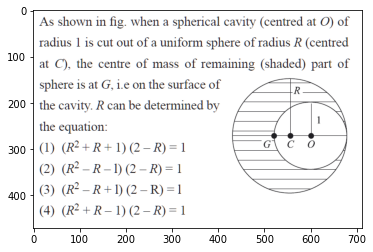

In [3]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [4]:
import cv2 
import numpy as np 
from PIL import Image, ImageDraw

In [5]:
class Detect:
    
    def __init__(self,img_name):
        self.img_name = img_name
        
    def detect_img(self):
        img = cv2.imread(self.img_name+".png", cv2.IMREAD_COLOR) 
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        image = Image.open(self.img_name+".png")
        image1  = Image.open(self.img_name+".png")

        draw = ImageDraw.Draw(image1)

        gray_blurred = cv2.blur(gray, (3, 3)) 
  
        detected_circles = cv2.HoughCircles(gray_blurred,  
        cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
        param2 = 30, minRadius = 40, maxRadius = 140) 

        mask_face = np.zeros(img.shape[:2] + (3,), np.uint8)
  
        if detected_circles is not None:

            detected_circles = np.uint16(np.around(detected_circles)) 

            for pt in detected_circles[0, :]: 
                a, b, r = pt[0], pt[1], pt[2] 

                cropp = [a-r,b-r,a+r,b+r]
                mask_face = cv2.rectangle(mask_face, (a-r,b-r), (a+r,b+r), (255,255,255), -1)
                diag_img  = image.crop(cropp)
                diag_img.save(self.img_name+'__diagram.png')

                draw.rectangle((a-r,b-r,a+r,b+r), fill=(255,255, 255, 255))
                image1.save(self.img_name+'__question.png')    
                break


In [6]:
import matplotlib.pyplot as plt

In [7]:
test1_img = cv2.imread("test.png")
gray = cv2.cvtColor(test1_img, cv2.COLOR_BGR2GRAY)

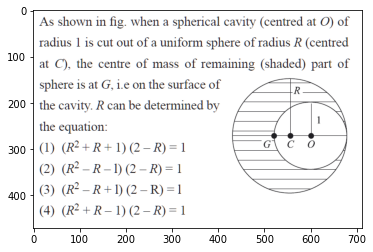

In [8]:
plt.imshow(test1_img)

In [9]:
#Current Directory
os.listdir()

['.ipynb_checkpoints',
 'desktop.ini',
 'Mathongo.ipynb',
 'test.png',
 'test1.png']

In [10]:
detect1 = Detect('test')
detect1.detect_img()

In [11]:
#After Detection in test.png
os.listdir()

['.ipynb_checkpoints',
 'desktop.ini',
 'Mathongo.ipynb',
 'test.png',
 'test1.png',
 'test__diagram.png',
 'test__question.png']

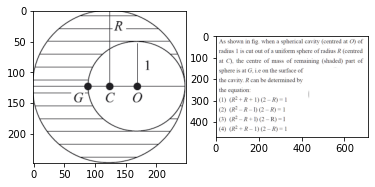

<Figure size 57600x57600 with 0 Axes>

In [12]:
diag,ques = cv2.imread('test__diagram.png'),cv2.imread('test__question.png')

fig, axs = plt.subplots(1,2)
plt.figure(figsize = (800,800))
axs[0].imshow(diag)
axs[1].imshow(ques)

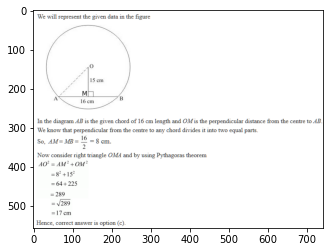

In [13]:
test2_img = cv2.imread("test1.png")
gray = cv2.cvtColor(test2_img, cv2.COLOR_BGR2GRAY)

plt.imshow(test2_img)

In [14]:
detect2 = Detect('test1')
detect2.detect_img()

In [15]:
#After Detection in test1.png
os.listdir()

['.ipynb_checkpoints',
 'desktop.ini',
 'Mathongo.ipynb',
 'test.png',
 'test1.png',
 'test1__diagram.png',
 'test1__question.png',
 'test__diagram.png',
 'test__question.png']

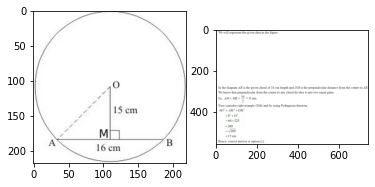

<Figure size 57600x57600 with 0 Axes>

In [16]:
diag,ques = cv2.imread('test1__diagram.png'),cv2.imread('test1__question.png')

fig, axs = plt.subplots(1,2)
plt.figure(figsize = (800,800))
axs[0].imshow(diag)
axs[1].imshow(ques)